### **Purpose: ** 

In [1]:
player = 'Ralf Souquet'
team = 'eu'

In [2]:
import pickle
import pandas as pd

In [3]:
path = '//DREW/Users/andrew/Desktop/mosconi/'
dframe = pickle.load(open(path+'pkl/allyears_clean_locs','rb'))
if 'a' in team.lower():
    df = dframe[dframe['American_player'].str.contains(player)]
    df['Europe_lost'] = ~ df['Europe_won']
    df = df[['Format', 'European_player', 'European_score', 'American_score',
       'American_player', 'Europe_lost','Europe_won']]
    df.columns = ['Format', 'European_player', 'European_score', 'American_score',
       'American_player', 'America_won', 'America_lost']
else:
    df = dframe[dframe['European_player'].str.contains(player)]
    df['Europe_lost'] = ~ df['Europe_won']

c:\users\andrew\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
def stats(df):
    try:
        if 'a' in team.lower():
            win = df['America_won'].sum()
            loss = df['America_lost'].sum()
        else:
            win = df['Europe_won'].sum()
            loss = df['Europe_lost'].sum()
        mp= win+loss
        wl = 'Win-loss: {}-{}'.format(win,loss)
        pct = round(win/(win+loss)*100,0)
        return('Matches Played: {}'.format(mp),wl,'Pct: {}'.format(pct))
    except:
        return('No matches to display')

### Lets have a quick look at his overall stats by checking out his singles, doubles, and team stats.

In [5]:
sing = df[df['Format']=='Singles']
dub = df[df['Format']=='Doubles']
teams = df[df['Format']=='Teams']
triples = df[df['Format']=='Triples'] 

In [6]:
'Overall: {}'.format(stats(df))
'Singles: {}'.format(stats(sing))
'Doubles: {}'.format(stats(dub))
'Teams:   {}'.format(stats(teams))
'Triples: {}'.format(stats(triples))

"Overall: ('Matches Played: 87', 'Win-loss: 52-35', 'Pct: 60.0')"

"Singles: ('Matches Played: 33', 'Win-loss: 20-13', 'Pct: 61.0')"

"Doubles: ('Matches Played: 44', 'Win-loss: 27-17', 'Pct: 61.0')"

"Teams:   ('Matches Played: 8', 'Win-loss: 4-4', 'Pct: 50.0')"

"Triples: ('Matches Played: 1', 'Win-loss: 0-1', 'Pct: 0.0')"

## So he plays equally well in both singles and doubles matches. 
### Let's see if he plays better with certain partners. 

In [7]:

if 'a' in team.lower():
    dub = dub[['European_player','American_player','America_won','America_lost']]
    dub['Partner']=dub['American_player'].str.replace(player,'')
    dub['Partner']=dub['Partner'].str.replace('&','')
    dub['Partner']=dub['Partner'].str.strip()
    dub.groupby('Partner').sum().sort_values(['America_won','America_lost'],ascending=False)    
else:
    dub = dub[['European_player','American_player','Europe_won','Europe_lost']]
    dub['Partner']=dub['European_player'].str.replace(player,'')
    dub['Partner']=dub['Partner'].str.replace('&','')
    dub['Partner']=dub['Partner'].str.strip()
    dub.groupby('Partner').sum().sort_values(['Europe_won','Europe_lost'],ascending=False)

,Europe_won,Europe_lost
Partner,,
Niels Feijen,7.0,1.0
Mika Immonen,5.0,4.0
Oliver Ortmann,4.0,3.0
Thomas Engert,3.0,1.0
Darren Appleton,3.0,0.0
Thorsten Hohmann,1.0,2.0
Daryl Peach,1.0,1.0
Chris Melling,1.0,0.0
Karl Boyes,1.0,0.0


### Looks like he does extremely well when partnered with Niels Feijen and Darren Appleton.

## Let's see if he performs better or worse against certain opponents in singles matches.

In [8]:
if 'a' in team.lower():
    sing.groupby('European_player').sum().sort_values('America_won',ascending = False)
else:
    sing.groupby('American_player').sum().sort_values('Europe_won',ascending = False)

,Europe_won,Europe_lost
American_player,,
Johnny Archer,2.0,2.0
Shane Van Boening,2.0,1.0
Corey Deuel,2.0,0.0
Earl Strickland,2.0,1.0
Jeremy Jones,2.0,1.0
C.J. Wiley,1.0,1.0
Roger Griffis,1.0,0.0
Rodney Morris,1.0,1.0
Nick Varner,1.0,0.0


## Nothing too conclusive.
## Let's see what his record was for each year.

In [9]:
lst =df.index.values.tolist() 
years = set([])
for item in lst:
    years.add(item[0])
years=list(years)

In [99]:
yearly=[]
for year in years:
    if 'a' in team:
        w = df.loc[year]['America_won'].sum()
        l = df.loc[year]['America_lost'].sum()
    else:
        w = df.loc[year]['Europe_won'].sum()
        l = df.loc[year]['Europe_lost'].sum()
    yearly.append((w,l))

In [100]:
yr= {}
for k,v in zip(years,yearly):
    yr[k]=v

In [115]:
win=[]
loss=[]
pct=[]
for w,l in yearly:
    win.append(w)
    loss.append(l)
    p=round((w*100/(w+l)),0)
    pct.append(p)

In [116]:
pct

[50.0,
 80.0,
 60.0,
 67.0,
 40.0,
 40.0,
 0.0,
 40.0,
 60.0,
 62.0,
 67.0,
 100.0,
 43.0,
 57.0,
 80.0,
 100.0]

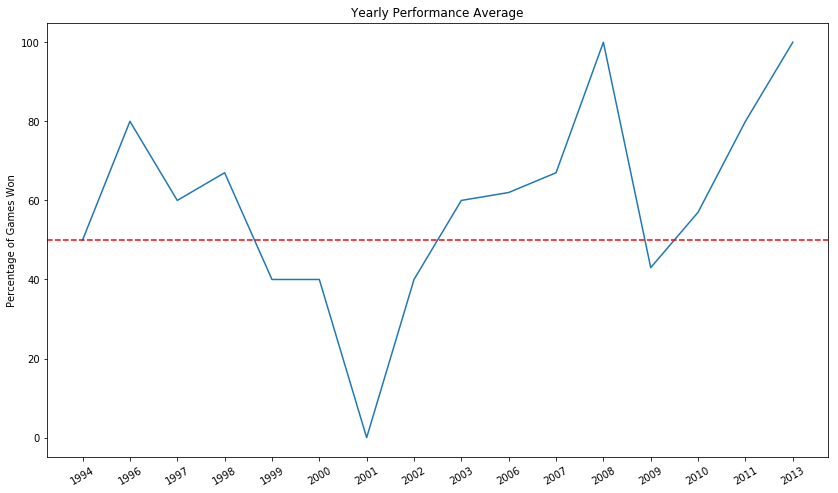

In [144]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ind = np.arange(len(years))  # the x locations for the groups

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)

ax.plot(pct)
# rects1 = ax.bar(ind, win, width, color='b')
# rects2 = ax.bar(ind+width, loss, width, color='r')

ax.axhline(50, color='r',linestyle='--')

# add some;
ax.set_ylabel('Percentage of Games Won');
ax.set_title('Yearly Performance Average');
ax.set_xticks(ind);
ax.set_xticklabels( (years),rotation=30 );
# ax.legend( (rects1[0], rects2[0]), ('Wins', 'Losses') );

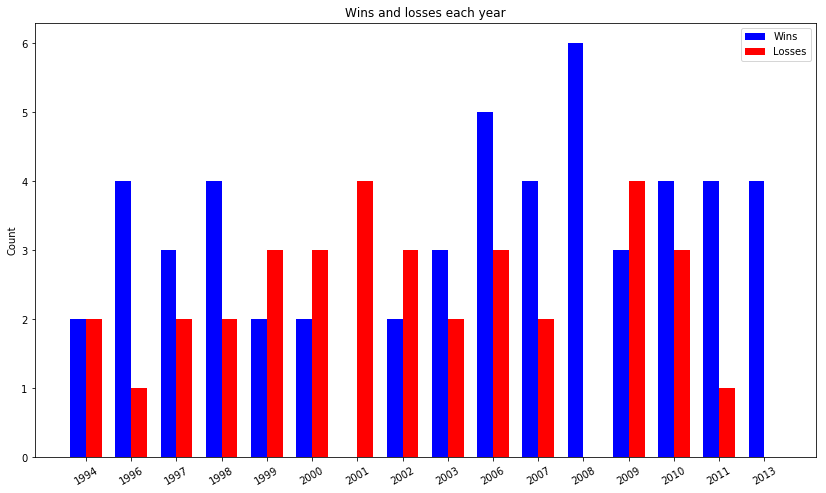

In [146]:
import numpy as np
import matplotlib.pyplot as plt

N = len(years)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, win, width, color='b')
rects2 = ax.bar(ind+width, loss, width, color='r')

# add some;
ax.set_ylabel('Count');
ax.set_title('Wins and losses each year');
ax.set_xticks(ind+width/2);
ax.set_xticklabels( (years),rotation=30 );
ax.legend( (rects1[0], rects2[0]), ('Wins', 'Losses') );

### So his worst years were: 2001, and his best years were: 1996, 2008, 2012, 2013. 
### Let's check how the team did each year he played.

In [23]:
def wincount(dframe=dframe,years=years,team=team):
    l=0
    w=0
    tie=0
    for year in years:
        f,t = dframe.loc[year]['Europe_won'].value_counts(sort=False)
        print(f,t)
        if f>t:
            l+=1
        elif f<t:
            w+=1
        else:
            tie+=1
    if 'a' in team:
        l,w = w,l
    return 'win-loss-tie: {}-{}-{}'.format(w,l,tie)

In [14]:
wincount()

16 12
15 13
13 8
13 9
12 7
12 9
12 1
9 12
11 9
12 12
8 11
5 11
11 7
8 11
7 11
2 11


'win-loss-tie: 6-9-1'

### So Europe went 6-9-1 with him on the team.
### Let's dig a bit deeper to see how big of a factor location has been for his performance.

In [15]:
locs = pickle.load(open(path+'pkl/dloc','rb'))

In [16]:
hm = []
aw = []

for year in years:
    if 'USA' in locs[year]:
        if 'a' in team.lower():
            hm.append(year)
        else:
            aw.append(year)
    else:
        if 'a' in team.lower():
            aw.append(year)
        else:
            hm.append(year)
away = df.loc[aw]
home = df.loc[hm]

In [17]:
'Played home {} times, away {} times'.format(len(hm),len(aw))

'Home Games: {}'.format(stats(home))

'Away Games: {}'.format(stats(away))

'Played home 11 times, away 5 times'

"Home Games: ('Matches Played: 60', 'Win-loss: 34-26', 'Pct: 57.0')"

"Away Games: ('Matches Played: 27', 'Win-loss: 18-9', 'Pct: 67.0')"

### So he plays better in away games. Interesting!

### Let's drill down a bit further to parse out his singles and doubles matches for both home and away 

In [18]:
hsing = stats(home[home['Format']=='Singles'])

In [19]:
hdub = stats(home[home['Format']=='Doubles'])

In [20]:
asing = stats(away[away['Format']=='Singles'])

In [21]:
adub = stats(away[away['Format']=='Doubles'])

In [22]:
'Home Singles: {}'.format(hsing)
'Home Doubles: {}'.format(hdub)
'Away Singles: {}'.format(asing)
'Away Doubles: {}'.format(adub)

"Home Singles: ('Matches Played: 23', 'Win-loss: 13-10', 'Pct: 57.0')"

"Home Doubles: ('Matches Played: 31', 'Win-loss: 18-13', 'Pct: 58.0')"

"Away Singles: ('Matches Played: 10', 'Win-loss: 7-3', 'Pct: 70.0')"

"Away Doubles: ('Matches Played: 13', 'Win-loss: 9-4', 'Pct: 69.0')"

### Away Singles and Doubles are both *very* high!